# **Week 5: Introduction to Random Variables**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```
*A random variable is neither random nor a variable.*

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Packages**
**Run the following lines of code**:

In [ ]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

**Do not modify the following**

In [ ]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Test passed 🥳


## **What Is A Random Variable? (Optional)**


A **random variable** is not really a “variable” in the usual algebraic sense, and it’s not “random” in itself.  
Formally, it is a **function** that maps outcomes of an experiment (from the *sample space*) to numerical values.

Mathematically:  
$$
X: \Omega \rightarrow \mathbb{R}
$$
where $\Omega$ is the set of all possible outcomes of the experiment.

### **Coin Tossing Experiment**
- Experiment: Toss a fair coin twice.  
- Sample space: $\Omega = \big\{\text{HH}, \text{HT}, \text{TH}, \text{TT}\big\}$
- Random variable: $X(\omega)$ = number of heads in the outcome $\omega \in \Omega$.  
- Mapping:  
  - HH → 2  
  - HT → 1  
  - TH → 1  
  - TT → 0  

### **Gaussian Random Variables**
In many problems, $X$ is **assumed** to follow a Gaussian (normal) distribution:  
$$
X \sim N(\mu, \sigma^2)
$$  
Here, there might be a physical experiment (e.g., measurement errors) *or* $X$ could be a purely theoretical construct used in modelling.

### **Why Do We Use This Complicated Definition?**

You may wonder why we use such a complicated and unintuitive definition — why call it a *function* instead of a *variable* or something that is *random*?

In probability theory, we **start** by defining probability on a sample space $\Omega$ (the set of all possible outcomes of the experiment). A random variable is just a way to **translate** those outcomes into numbers. This is to ensure that probability rules (i.e., axioms of probability) are always satisfied and that all probability assignments are consistent.  

Relying on a well-defined sample space $\Omega$ gives us a **common foundation**:  
- Every random variable is defined as a function on $\Omega$,  
- Probabilities of events like $P(X \le 2)$ are automatically consistent with the probability measure on $\Omega$,  
- This guarantees that all rules (e.g., $0 \le P(\cdot) \le 1$, $P(\Omega) = 1$, additivity for disjoint events) hold without having to check each case separately.



This translation makes it possible to define important tools like the **PMF**, **PDF**, and **CDF** of $X$. Without starting from $\Omega$, these concepts would not have a rigorous foundation.



#### **Example**


When we write:

$$
P(X \leq 2)
$$

we really mean:

$$
P(\{\omega \in \Omega : X(\omega) \leq 2\})
$$

That is, we are looking for the probability of **all outcomes in the sample space** $ \Omega $  whose random variable value is less than or equal to 2. We can verify if some common probability rules such as non-negativity and complement rule still hold.

- Non-negativity  
By definition of a probability measure:  

$$
0 \le P(E) \le 1 \quad \text{for any event } E \subseteq \Omega
$$  

Set $E = \{\omega \in \Omega : X(\omega) \le 2\}$. Then:  

$$
0 \le P(X \le 2) = P(E) \le 1
$$  

- Complement Rule

Let $A \subseteq \mathbb{R}$, e.g., $A = (-\infty, 2]$. Its complement is $A^c = (2, \infty)$. Then:  

$$
\{\omega : X(\omega) \in A^c\} = \Omega \setminus \{\omega : X(\omega) \in A\}  
$$  

So by the complement property of $P$ on $\Omega$:  

$$
P(X \in A^c) = P(\Omega) - P(X \in A) = 1 - P(X \in A)
$$  


ERROR: Error in library("patchwork"): there is no package called ‘patchwork’


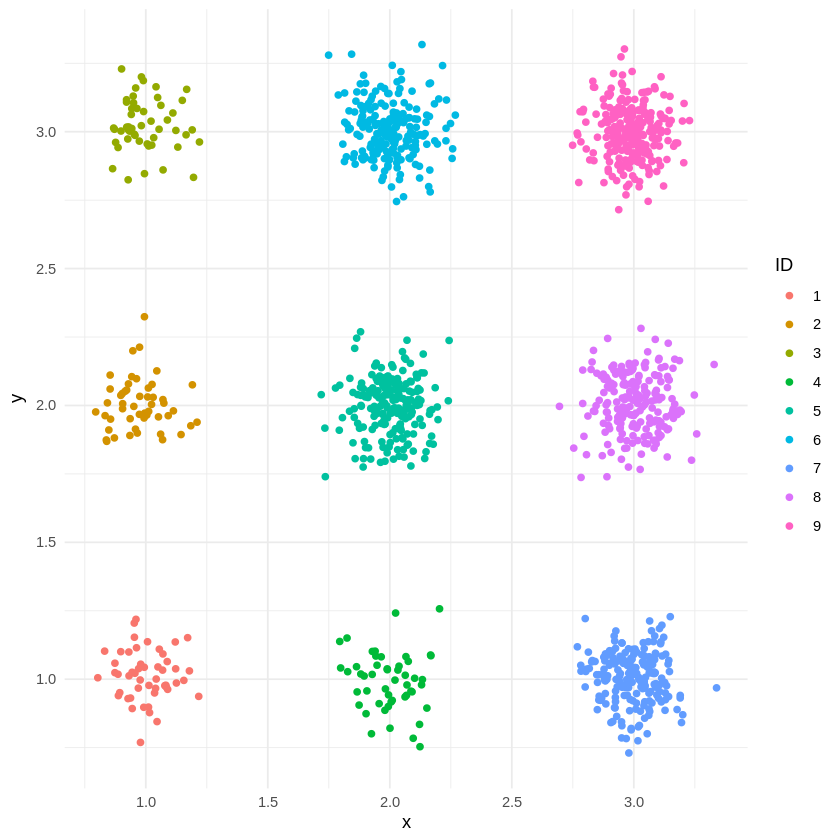

In [42]:
library(dplyr)
set.seed(123)

# 1. Create dataset: 9 rectangles, different populations
grid <- expand.grid(row = 1:3, col = 1:3)
n_points_per_rect <- 50*c(1,1,1,1,4,4,4,4,5)

pop <- do.call(rbind, lapply(1:nrow(grid), function(i) {
  n <- n_points_per_rect[i]
  data.frame(
    x = grid$col[i] + rnorm(n, 0, 0.1),
    y = grid$row[i] + rnorm(n, 0, 0.1),
    ID = i
  )
}))







Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



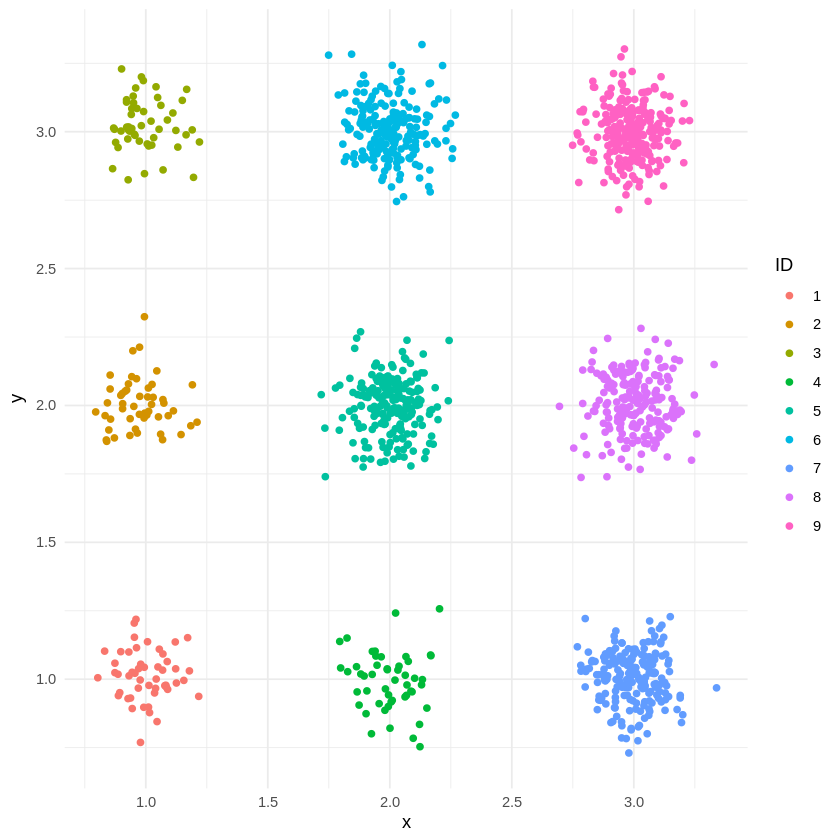

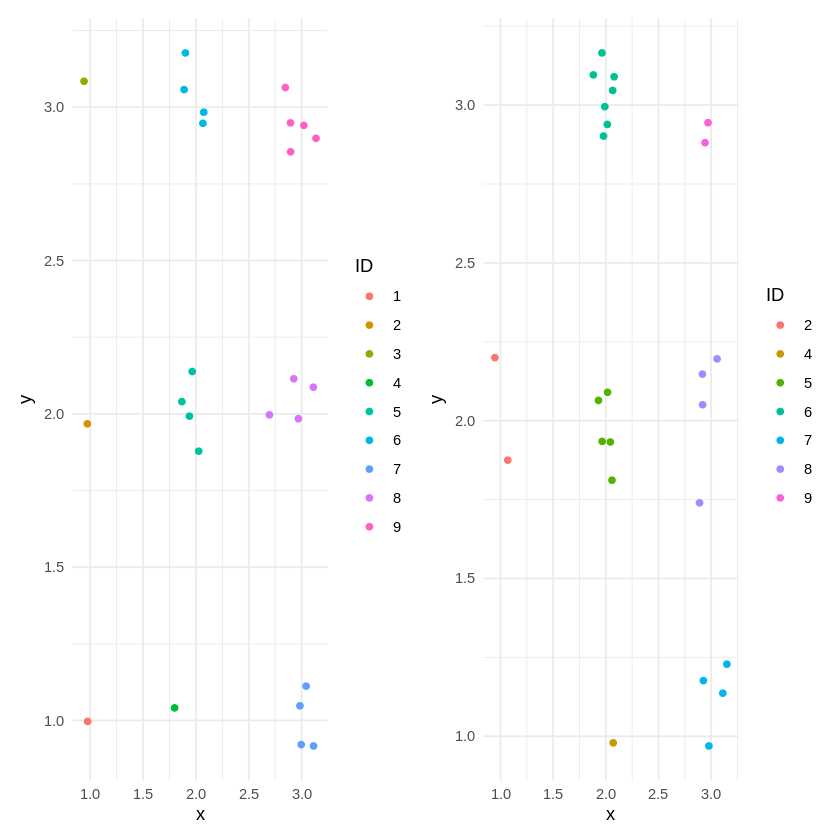

In [44]:
install.packages("patchwork")

library(ggplot2)
library(dplyr)
set.seed(NULL)
pop %>%
  mutate(ID = as.character(ID)) %>%
  ggplot(aes(x = x, y = y, colour = ID)) +
  geom_point() +
  theme_minimal()

n = nrow(pop)

pop %>%
  mutate(ID = as.character(ID)) %>%
  group_by(ID) %>%
  sample_n(max(1, 25*n()/n))  %>%
  ggplot(aes(x = x, y = y, colour = ID)) +
  geom_point() +
  theme_minimal()  -> a


pop %>%
  mutate(ID = as.character(ID)) %>%
  sample_n(25)  %>%
  ggplot(aes(x = x, y = y, colour = ID)) +
  geom_point() +
  theme_minimal()  -> b
library("patchwork")
a | b

### **Physical vs. Abstract Random Variables**

In this workshop, we will encounter several random variables.  Some are intuitive—like the Bernoulli or binomial —and can be linked to real-life experiments we understand.  

However, not every random variable has a tangible experiment behind it.  Some are **thought experiments** or abstract models—black boxes that produce values according to certain probabilistic rules.  

In practice, we often focus more on the **distributional properties** of a random variable—such as its PMF, PDF, or CDF—rather than the precise way it is defined mathematically. It is common that people refer to a random variable directly by its PMF or PDF (for example, saying “$X$ is Normal with mean $\mu$ and variance $\sigma^2$”) rather than giving a fully formal definition in terms of the underlying sample space.
